# Example of minimizing a sum of absolute values

We use linear regression minimizing the absolute deviations. 

We follow closely this [paper](https://www.jstor.org/stable/1402501).

Let us start by adding `pyomo` and `glpk` to our `colab` session.

In [ ]:
!pip install -q pyomo

In [ ]:
# we add glpk now
!sudo apt install libglpk-dev python3.8-dev libgmp3-dev
!apt-get install -y -qq glpk-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgmp3-dev is already the newest version (2:6.1.2+dfsg-2).
libglpk-dev is already the newest version (4.65-1).
python3.8-dev is already the newest version (3.8.12-1+bionic3).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-ns

# Generate data

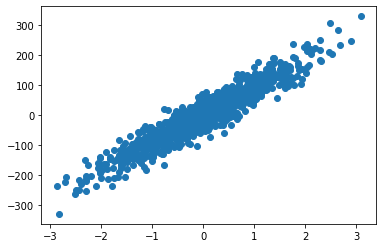

In [ ]:
n_features = 1 # 1 may be visualized, > 1 works fine but no drawing
n_samples  = 1000
noise      = 30

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2020)
# generate regression dataset
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=noise)

if n_features == 1:
    plt.scatter(X,y)
    plt.show()

# Model



In [ ]:
import pyomo.environ as pyo

In [ ]:
m = pyo.ConcreteModel('min abs')

In [ ]:
n,k = X.shape

In [ ]:
m.I = range(n)
m.J = range(k)

In [ ]:
m.ep = pyo.Var(m.I,within=pyo.NonNegativeReals)
m.em = pyo.Var(m.I,within=pyo.NonNegativeReals)
m.m  = pyo.Var(m.J)
m.b  = pyo.Var()

In [ ]:
m.fit = pyo.Constraint( m.I, rule = lambda m, i : m.b + m.ep[i] - m.em[i] + sum(X[i][j]*m.m[j] for j in m.J) == y[i] )

In [ ]:
m.obj = pyo.Objective( expr = sum( m.ep[i] + m.em[i] for i in m.I ), sense = pyo.minimize )

In [ ]:
%time pyo.SolverFactory('glpk').solve(m)

CPU times: user 98.1 ms, sys: 10.1 ms, total: 108 ms
Wall time: 258 ms


{'Problem': [{'Name': 'unknown', 'Lower bound': 23438.9432109967, 'Upper bound': 23438.9432109967, 'Number of objectives': 1, 'Number of constraints': 1001, 'Number of variables': 2003, 'Number of nonzeros': 4001, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.15665483474731445}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

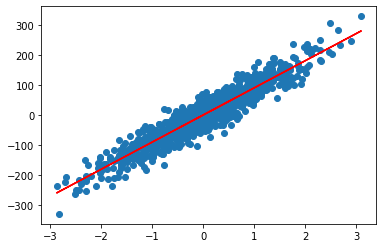

In [ ]:
if n_features ==  1:
    plt.scatter(X,y)
    plt.plot([ x[0] for x in X ], [ pyo.value(m.b) + pyo.value(m.m[0])*x[0] for x in X ], 'r' )
    plt.show()
else:
    print( pyo.value(m.b),[pyo.value(m) for m in m.m.values() ] )